# NAME : - NIVYA K S

# INTRODUCTION :-
This project aims to analyze and visualize temperature data from the NOAA dataset, focusing on the period 2005-2015. The key objectives include:

(1)Plotting record high and low temperatures by day of the year.
(2)Identifying and highlighting temperature records broken in 2015.
(3)Visualizing station locations on a map.
(4)Creating a temperature summary for the year 2015.

# Data Preparation and Analysis

# Import necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import plotly.graph_objects as go


# Load the data:

In [2]:
# Load the temperature dataset
temperature_data = pd.read_csv("C:/Users/Nivya Rajeesh/Downloads/temperature (1) (1) (1).csv")


In [3]:
# Display the first 5 rows of temperature data
print(temperature_data.head())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


In [4]:
# Get summary of the data using info()
print("\nInformation about Temperature Data:")
print(temperature_data.info())


Information about Temperature Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB
None


In [5]:
# Get statistical summary of numerical columns using describe()
print("\nStatistical Summary of Temperature Data:")
print(temperature_data.describe())


Statistical Summary of Temperature Data:
          Data_Value
count  165085.000000
mean       95.422116
std       123.515131
min      -343.000000
25%         0.000000
50%        94.000000
75%       189.000000
max       406.000000


In [6]:
# Load the BinSize dataset
data = pd.read_csv("C:/Users/Nivya Rajeesh/Downloads/BinSize (1) (1) (1).csv")

In [7]:
# Display the first 5 rows of BinSize data
print(data.head())

            ID  LATITUDE  LONGITUDE  ELEVATION STATE                 NAME  \
0  AE000041196    25.333     55.517       34.0   NaN  SHARJAH INTER. AIRP   
1  AEM00041194    25.255     55.364       10.4   NaN           DUBAI INTL   
2  AEM00041217    24.433     54.651       26.8   NaN       ABU DHABI INTL   
3  AEM00041218    24.262     55.609      264.9   NaN          AL AIN INTL   
4  AFM00040990    31.500     65.850     1010.0   NaN     KANDAHAR AIRPORT   

  GSNFLAG HCNFLAG    WMOID             x             y  \
0     GSN     NaN  41196.0  5.579578e+06  2.816905e+06   
1     NaN     NaN  41194.0  5.567782e+06  2.808232e+06   
2     NaN     NaN  41217.0  5.532707e+06  2.716829e+06   
3     NaN     NaN  41218.0  5.637301e+06  2.697815e+06   
4     NaN     NaN  40990.0  6.243199e+06  3.502645e+06   

                                  x_group  \
0  5497601.479782179 to 5594934.908498545   
1  5497601.479782179 to 5594934.908498545   
2  5497601.479782179 to 5594934.908498545   
3   5594

In [8]:
print("\nInformation about BinSize Data:")
print(data.info())


Information about BinSize Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  y          18259 non-null  float64
 11  x_group    18258 non-null  object 
 12  y_group    18259 non-null  object 
 13  xy_group   18259 non-null  object 
 14  hash       18259 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.1+ MB
None


In [9]:
print("\nStatistical Summary of Data:")
print(data.describe())


Statistical Summary of Data:
           LATITUDE     LONGITUDE     ELEVATION         WMOID             x  \
count  18259.000000  18259.000000  18259.000000   6171.000000  1.825900e+04   
mean      36.862167    -54.090018    582.410685  58389.632799 -4.328554e+06   
std       22.016258     81.612630    713.235554  26847.030026  6.932991e+06   
min      -90.000000   -179.983000   -999.900000   1001.000000 -1.922509e+07   
25%       34.411800   -110.100000     88.000000  34318.000000 -8.820602e+06   
50%       41.109200    -88.190600    281.000000  67315.000000 -7.363517e+06   
75%       47.531100      5.226550    806.100000  74504.000000  3.517924e+05   
max       82.516700    179.320000   4701.000000  98851.000000  1.970828e+07   

                  y  
count  1.825900e+04  
mean   4.098892e+06  
std    2.448100e+06  
min   -1.000756e+07  
25%    3.826423e+06  
50%    4.571141e+06  
75%    5.285225e+06  
max    9.175451e+06  


# Clean and preprocess data:

In [10]:
# Convert the 'Date' column to datetime format
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

# Remove February 29th from the dataset
temperature_data = temperature_data[temperature_data['Date'].dt.strftime('%m-%d') != '02-29']

# Display the filtered dataset
print(temperature_data)

                 ID       Date Element  Data_Value
0       USW00094889 2014-11-12    TMAX          22
1       USC00208972 2009-04-29    TMIN          56
2       USC00200032 2008-05-26    TMAX         278
3       USC00205563 2005-11-11    TMAX         139
4       USC00200230 2014-02-27    TMAX        -106
...             ...        ...     ...         ...
165080  USC00205822 2015-06-09    TMAX         256
165081  USC00205822 2009-10-06    TMAX         167
165082  USC00205050 2014-07-14    TMAX         283
165083  USC00200230 2006-11-29    TMIN         117
165084  USC00207312 2006-09-04    TMIN         111

[165002 rows x 4 columns]


# Visualizations


Line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded. 


C:\Users\Nivya Rajeesh\AppData\Local\Temp\ipykernel_25468\2591816309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2005_2014['day_of_year'] = data_2005_2014['Date'].dt.strftime('%m-%d')


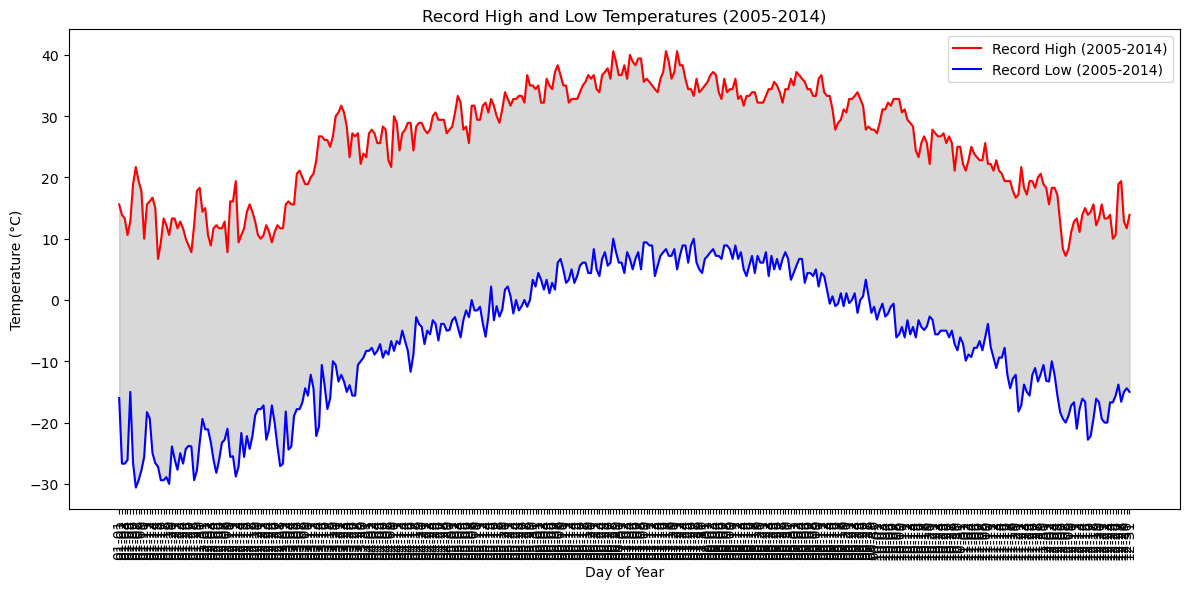

In [11]:

# Filter the data for years 2005 to 2014
mask = (temperature_data['Date'].dt.year >= 2005) & (temperature_data['Date'].dt.year <= 2014)
data_2005_2014 = temperature_data[mask]

# Extract the day of the year (ignore the year component)
data_2005_2014['day_of_year'] = data_2005_2014['Date'].dt.strftime('%m-%d')

# Separate TMAX and TMIN data
tmax_data = data_2005_2014[data_2005_2014['Element'] == 'TMAX']
tmin_data = data_2005_2014[data_2005_2014['Element'] == 'TMIN']

# Group by day of the year and calculate the max and min temperatures
record_highs = tmax_data.groupby('day_of_year')['Data_Value'].max()
record_lows = tmin_data.groupby('day_of_year')['Data_Value'].min()

# Plot the line graph with shaded area between high and low records
plt.figure(figsize=(12, 6))
plt.plot(record_highs.index, record_highs.values / 10, label='Record High (2005-2014)', color='red')  # Scale by 10
plt.plot(record_lows.index, record_lows.values / 10, label='Record Low (2005-2014)', color='blue')   # Scale by 10
plt.fill_between(record_highs.index, record_highs.values / 10, record_lows.values / 10, color='gray', alpha=0.3)

# Customize the plot
plt.title('Record High and Low Temperatures (2005-2014)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(loc='best')
plt.tight_layout()

# Show the plot
plt.show()

(1)The red line represents the record high temperatures during the period, consistently peaking above 30°C during the summer months.

(2)The blue line represents record lows, with the lowest points reaching approximately -30°C in winter.

(3)The shaded gray area between the record highs and lows indicates the day of the year's temperature .The widest range appears during the summer months, where the variation between record high and low temperatures is greatest.

(4)The winter months show a narrower range, where the variation is smaller, suggesting that extreme temperatures (both high and low) are closer to each other in winter than in summer.

Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. 


C:\Users\Nivya Rajeesh\AppData\Local\Temp\ipykernel_25468\2556133937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['day_of_year'] = data_2015['Date'].dt.strftime('%m-%d')


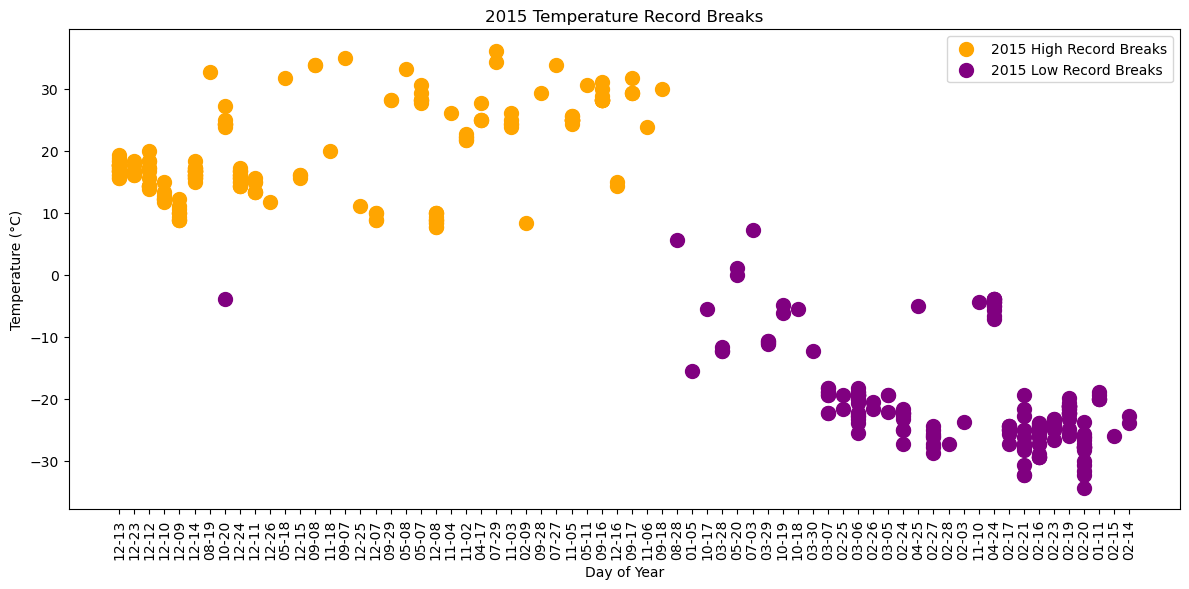

In [12]:

# Extract the 2015 data
data_2015 = temperature_data[temperature_data['Date'].dt.year == 2015]
data_2015['day_of_year'] = data_2015['Date'].dt.strftime('%m-%d')

# Filter for years 2005 to 2014 to establish record highs and lows
mask = (temperature_data['Date'].dt.year >= 2005) & (temperature_data['Date'].dt.year <= 2014)
data_2005_2014 = temperature_data[mask]

# Extract TMAX and TMIN for the 2005-2014 records
tmax_data = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].max()
tmin_data = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].min()

# Identify highs and lows for 2015
tmax_2015 = data_2015[data_2015['Element'] == 'TMAX'].set_index('day_of_year')['Data_Value']
tmin_2015 = data_2015[data_2015['Element'] == 'TMIN'].set_index('day_of_year')['Data_Value']

# Create a scatter plot for 2015 data
plt.figure(figsize=(12, 6))

# Overlay 2015 high record breaks
plt.scatter(tmax_2015.index[tmax_2015 > tmax_data[tmax_2015.index]], 
            tmax_2015[tmax_2015 > tmax_data[tmax_2015.index]] / 10, 
            color='orange', label='2015 High Record Breaks', marker='o', s=100)

# Overlay 2015 low record breaks
plt.scatter(tmin_2015.index[tmin_2015 < tmin_data[tmin_2015.index]], 
            tmin_2015[tmin_2015 < tmin_data[tmin_2015.index]] / 10, 
            color='purple', label='2015 Low Record Breaks', marker='o', s=100)

# Customize the plot
plt.title('2015 Temperature Record Breaks')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(loc='best')
plt.tight_layout()

# Show the plot
plt.show()

(1)The orange dots illustrate a notable cluster of high temperatures, particularly in the late spring and summer months, with some temperatures reaching above 30°C.

(2)The presence of multiple high records in the months of March through August suggests a significant warming trend or anomalous weather patterns during that year.

(3)The purple dots show low temperatures clustered mainly between -30°C and 0°C, with most of these records occurring in late winter and early spring (December through February).

(4)This pattern indicates that while there were extreme low temperatures, the record-breaking lows did not reach as high of a frequency or temperature magnitude as the highs.

(5)The distribution of both high and low records shows that the months of December, January, and February have a higher occurrence of low temperature records, aligning with the winter season.

(6)Conversely, record highs are more prevalent in the later months, particularly during the summer, indicating seasonal temperature trends.

 The data that have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.

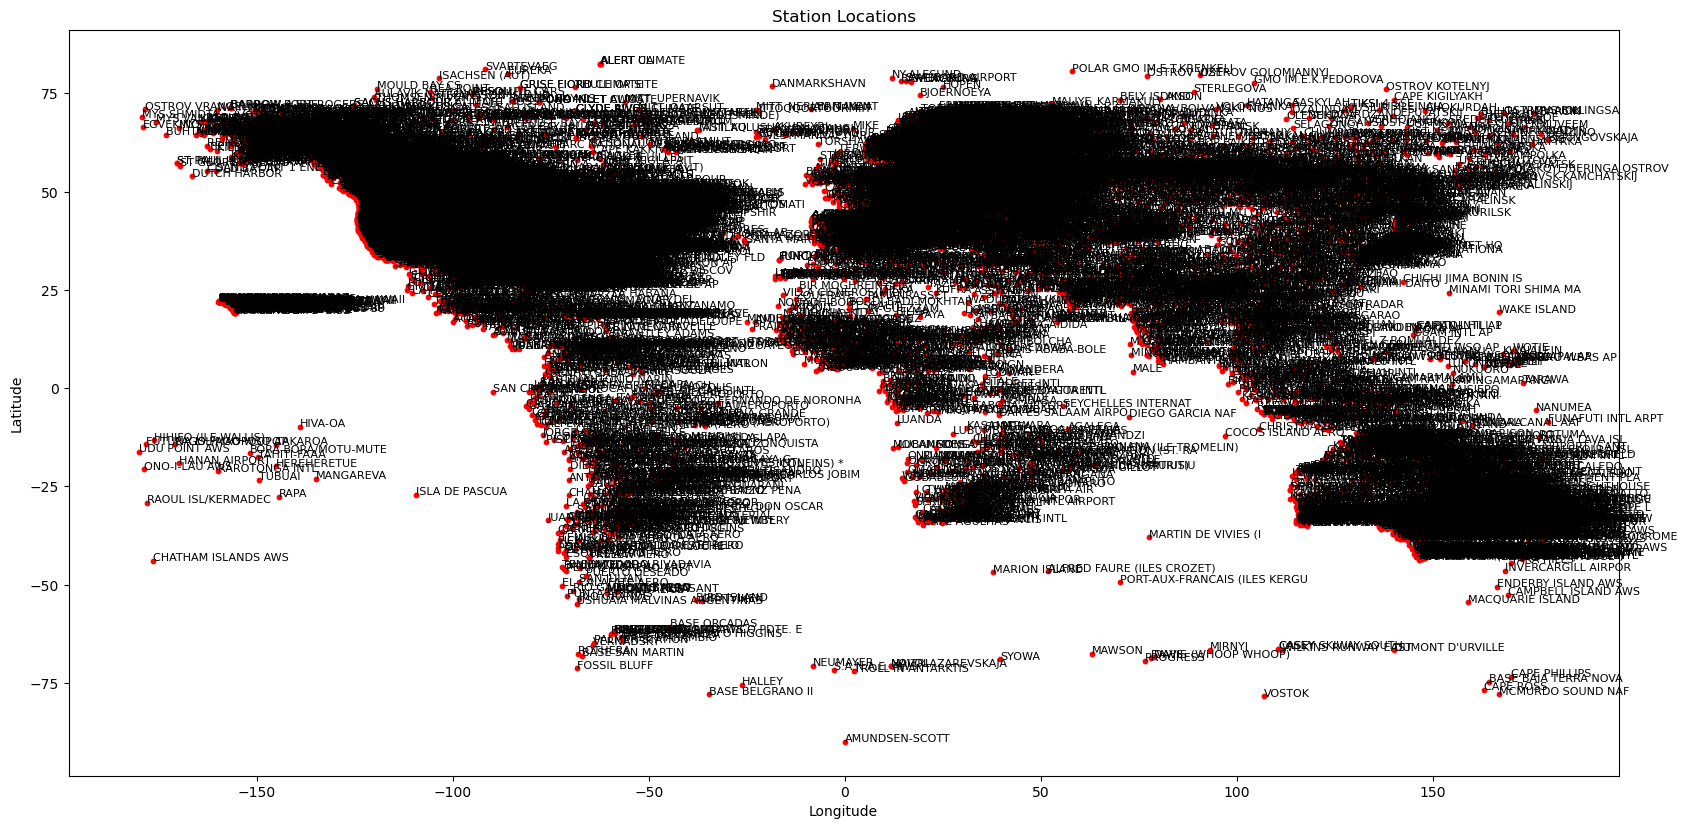

In [16]:
# Create geometry column from latitude and longitude
# Shapely's Point function is used to create Point geometries
data['geometry'] = data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry')

# Set a coordinate reference system (CRS) if not already defined (assuming WGS 84 here)
gdf.set_crs(epsg=4326, inplace=True)

# Plot the stations on a map
ax = gdf.plot(marker='o', color='red', markersize=10, figsize=(20, 20))

# Annotating the map with labels (if there's a 'station_name' column)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['NAME']):
    plt.text(x, y, label, fontsize=8)

# Optional: Set map title and labels
plt.title('Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the map
plt.show()

 Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

In [20]:
temperature_data['Date'] = temperature_data['Date'].astype(str)

In [21]:
# Filter data for 2015 in both datasets
temperature_data_2015 = temperature_data[temperature_data['Date'].str.startswith('2015')]
data_2015 = data[temperature_data['Date'].str.startswith('2015')]

# Merge the filtered data
merged_data = pd.merge(temperature_data_2015, data_2015, on='ID')


C:\Users\Nivya Rajeesh\AppData\Local\Temp\ipykernel_25468\51700131.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2015 = data[temperature_data['Date'].str.startswith('2015')]


In [22]:
print(merged_data)

              ID        Date Element  Data_Value  LATITUDE  LONGITUDE  \
0    USW00004848  2015-06-29    TMIN         161   41.5631   -83.4764   
1    USW00004848  2015-03-31    TMIN           0   41.5631   -83.4764   
2    USW00004848  2015-06-29    TMAX         206   41.5631   -83.4764   
3    USW00004848  2015-03-31    TMAX          72   41.5631   -83.4764   
4    USW00004848  2015-08-27    TMAX         228   41.5631   -83.4764   
..           ...         ...     ...         ...       ...        ...   
711  USW00004848  2015-01-16    TMIN         -60   41.5631   -83.4764   
712  USW00004848  2015-07-10    TMAX         250   41.5631   -83.4764   
713  USW00004848  2015-07-10    TMIN         172   41.5631   -83.4764   
714  USW00004848  2015-09-18    TMIN         161   41.5631   -83.4764   
715  USW00004848  2015-09-18    TMAX         272   41.5631   -83.4764   

     ELEVATION STATE                NAME GSNFLAG HCNFLAG  WMOID             x  \
0        189.6    OH  TOLEDO METCALF FLD  

In [23]:
# Assuming 'Element' is the column containing 'TMAX' and 'TMIN'
data_2015_pivoted = merged_data.pivot_table(index='Date', columns='Element', values='Data_Value')

# Create a line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_2015_pivoted.index, y=data_2015_pivoted['TMAX'], name='Average High'))
fig.add_trace(go.Scatter(x=data_2015_pivoted.index, y=data_2015_pivoted['TMIN'], name='Average Low'))

# Customize the chart
fig.update_layout(title='Temperature Summary for Ann Arbor, Michigan, United States(2015)',
                  xaxis_title='Day of the Year',
                  yaxis_title='Temperature (tenths of degrees Celsius)')

fig.show()

The graph provides a visual representation of the average high and low temperatures in Ann Arbor, Michigan and US throughout the year 2015. 
(1)Winter: Temperatures are lowest in January and February, often dipping below -100 tenths of degrees Celsius (around -10 degrees Fahrenheit).

(2)Spring: Temperatures begin to rise in March, reaching a peak in May.

(3)Summer: The hottest months are June, July, and August, with average highs exceeding 300 tenths of degrees Celsius (around 86 degrees Fahrenheit).

(4)Fall: Temperatures gradually decline from September to December.
Temperature Range:

# Thank You